In [424]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import random

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, LassoLars
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, explained_variance_score, d2_absolute_error_score
from sklearn.metrics import max_error, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, mean_poisson_deviance


In [425]:

def plot_graph(stock_df, test_x, test_y, prediction_y, model_name):
    plt.figure(figsize=(12,8),dpi=100)
    ax = plt.axes()
    ax.grid()
    ax.set(xlabel='Date', ylabel='Stock Price', title=model_name)
    test_x['date'] = stock_df['date']

    ax.plot(stock_df['date'], stock_df['close'], label='actual', c='b', linewidth=1)
    ax.plot(test_x['date'], test_y, label='test', c='r', linewidth=1)
    ax.plot(test_x['date'], prediction_y, label='prediction', c='g', linewidth=1)

    ax.xaxis.set_major_locator(mticker. MultipleLocator(12))

    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    plt.tight_layout()
    plt.legend()
    plt.show()

regression_metrics = [r2_score, d2_absolute_error_score, max_error, mean_absolute_error, mean_squared_error]
metric_names = ['R2 Score', 'D2 Absolute Error Score', 'Max Error', 'Mean Absolute Error', 'Mean Squared Error']
#explained_variance_score, , mean_absolute_percentage_error,, mean_poisson_deviance,

def calculate_metrics(y_true, y_pred, model_name):
    print(f"---- Model: {model_name} ----")
    
    for idx, metric in enumerate(regression_metrics):
        metric_result = metric(y_true, y_pred)
        print(f"{metric_names[idx]:30} {metric_result}")

    print("----------------------\n\n")


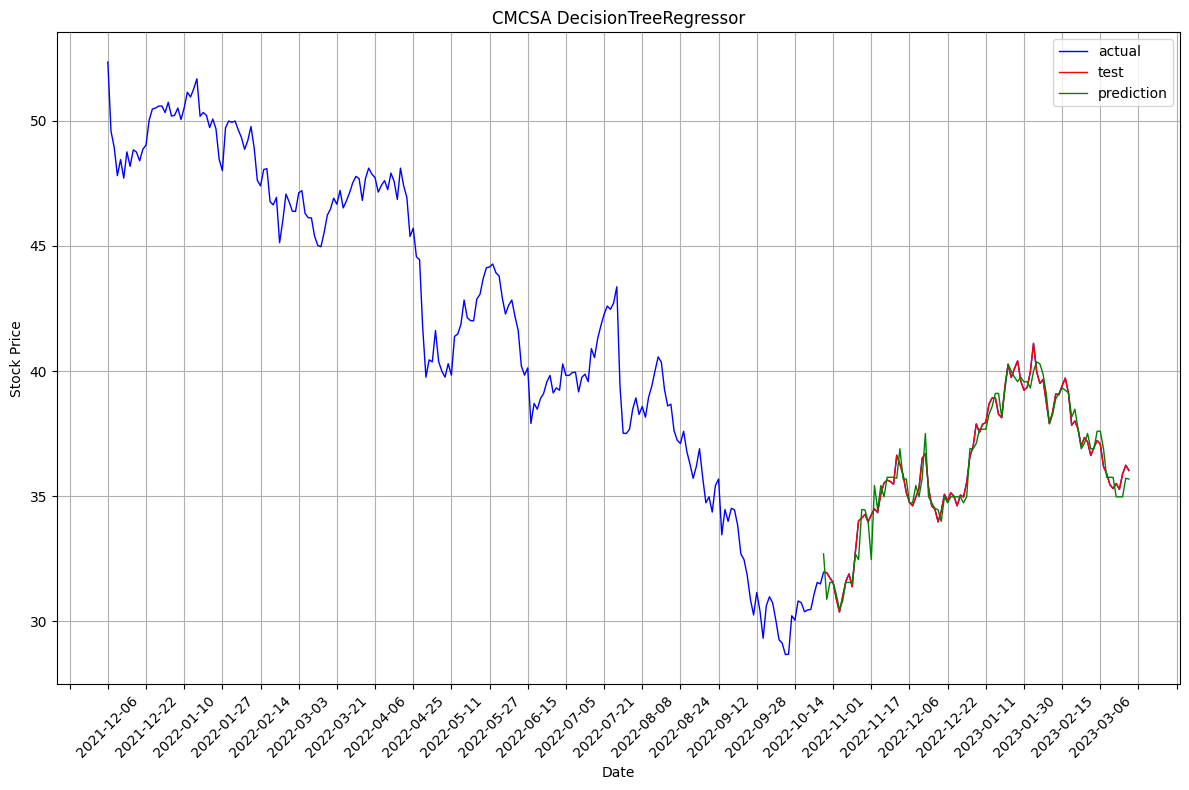

---- Model: CMCSA DecisionTreeRegressor ----
R2 Score                       0.9625986759932338
D2 Absolute Error Score        0.8263352028699913
Max Error                      1.7899999999999991
Mean Absolute Error            0.35432989690721667
Mean Squared Error             0.23246082474226823
----------------------




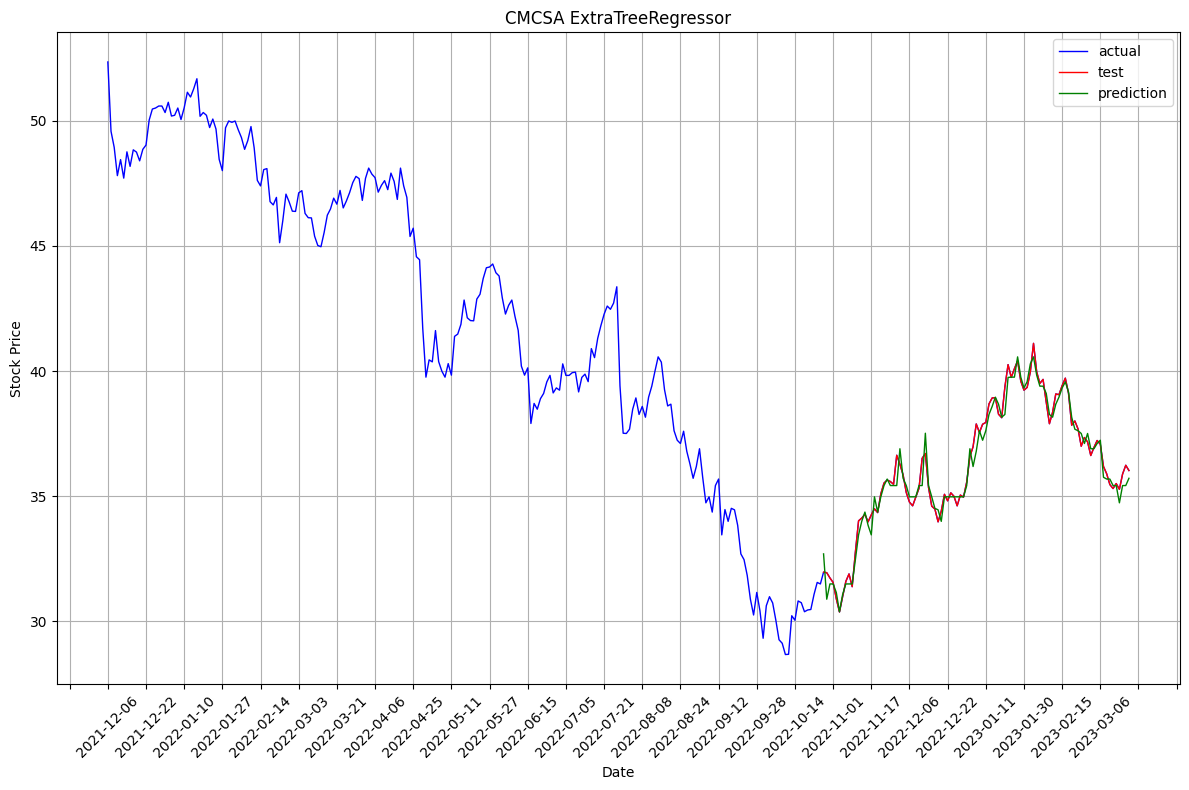

---- Model: CMCSA ExtraTreeRegressor ----
R2 Score                       0.9734866549474624
D2 Absolute Error Score        0.8536203324743572
Max Error                      1.2100000000000009
Mean Absolute Error            0.29865979381443275
Mean Squared Error             0.16478865979381438
----------------------




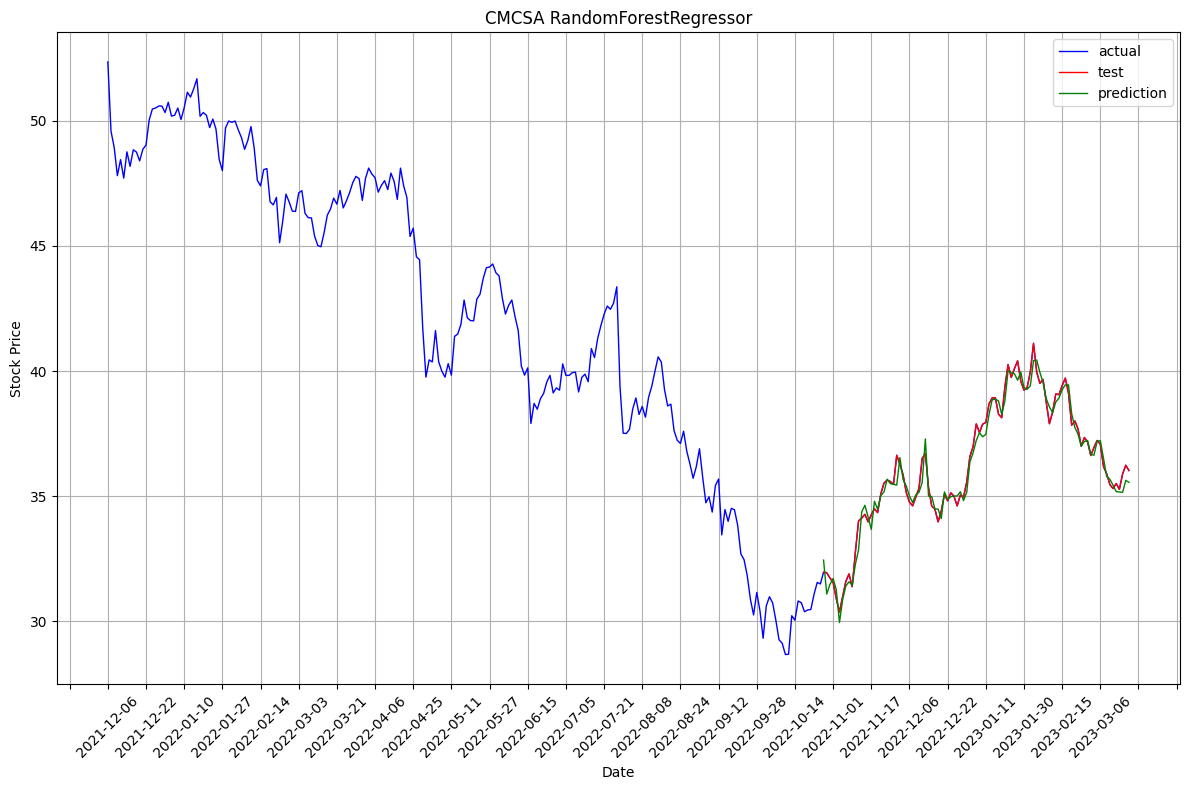

---- Model: CMCSA RandomForestRegressor ----
R2 Score                       0.9759394771738148
D2 Absolute Error Score        0.852810368349248
Max Error                      1.1916000000000224
Mean Absolute Error            0.3003123711340241
Mean Squared Error             0.1495436091752617
----------------------




In [426]:

ticker_symbol = 'CMCSA'

candle_csv_file_path = './data/candlestick_data.csv'

all_stock_df = pd.read_csv(candle_csv_file_path, header = 0).sort_values(by=['unix_time'])

company_stock_data_df = all_stock_df[all_stock_df['symbol'] == ticker_symbol]

stock_analysis_data_df = company_stock_data_df.drop(['date','symbol','unix_time'], axis=1)

data_x = stock_analysis_data_df.loc[:,stock_analysis_data_df.columns != 'close' ]
data_y = stock_analysis_data_df['close']

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, shuffle=False, random_state=1)

tree_ensemble_models = [DecisionTreeRegressor(), ExtraTreeRegressor(), RandomForestRegressor()]
prediction_list = []

for model in tree_ensemble_models:
    trained_model = model.fit(x_train, y_train)
    prediction = trained_model.predict(x_test)
    prediction_list.append([prediction, ticker_symbol + " " + str(model)[:-2]])

for prediction in prediction_list:
    plot_graph(company_stock_data_df, x_test, y_test, prediction[0], prediction[1])
    calculate_metrics(y_test, prediction[0], prediction[1])


In [427]:
def plot_scatter(stock_df, test_x, test_y, prediction_y, model_name):
    plt.figure(figsize=(12,8),dpi=100)
    ax = plt.axes()
    ax.grid()
    ax.set(xlabel='Date', ylabel='Stock Price', title=model_name)
    #test_x['date'] = stock_df['date']

    ax.plot(stock_df['date'], stock_df['close'], label='actual', c='b', linewidth=1, alpha=.5)
    #ax.scatter(test_x['date'], test_y, label='test', c='r')
    ax.scatter(test_x.index, prediction_y, label='prediction', c='g') # marker='*'

    ax.xaxis.set_major_locator(mticker. MultipleLocator(12))

    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    plt.tight_layout()
    plt.legend()
    plt.show()

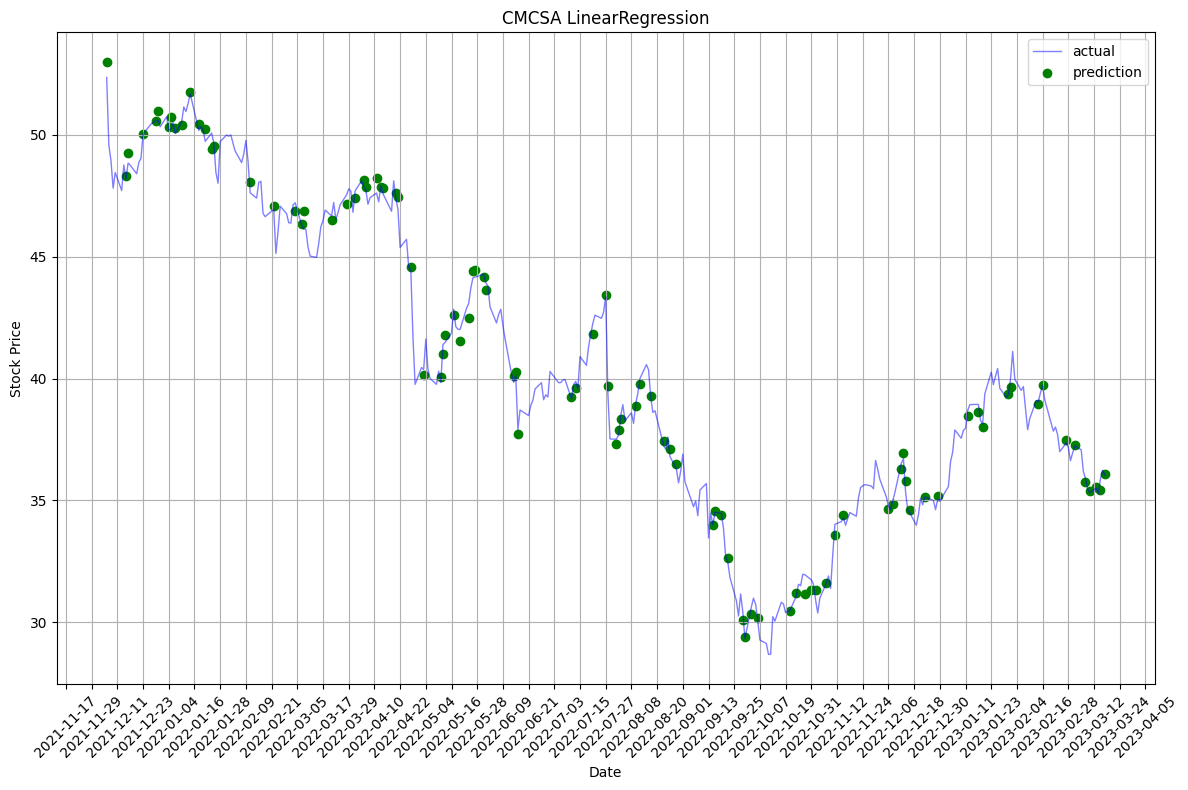

---- Model: CMCSA LinearRegression ----
R2 Score                       0.9978531233523232
D2 Absolute Error Score        0.9566327431922304
Max Error                      0.7981653211447544
Mean Absolute Error            0.2319567028557431
Mean Squared Error             0.0851523040142231
----------------------




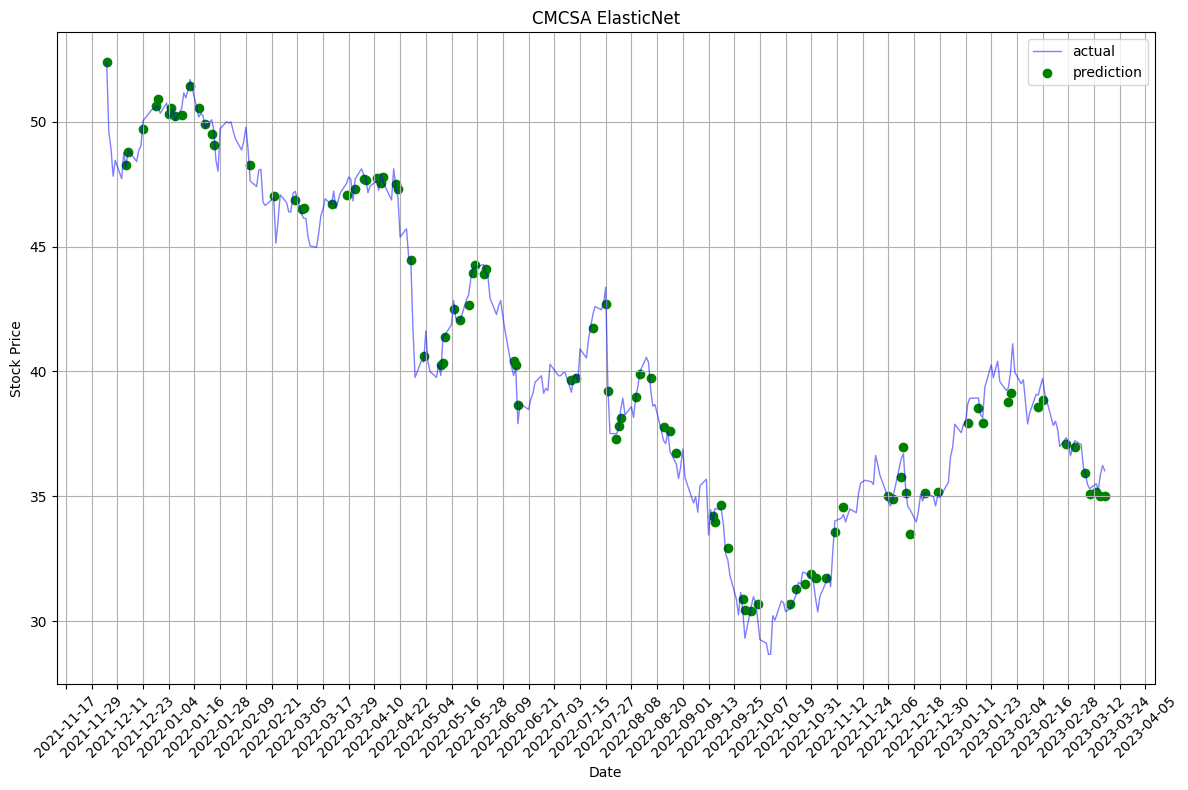

---- Model: CMCSA ElasticNet ----
R2 Score                       0.9951328366075701
D2 Absolute Error Score        0.9342828986684777
Max Error                      1.115718789612174
Mean Absolute Error            0.3514984176579423
Mean Squared Error             0.19304796916374956
----------------------




In [428]:
ticker_symbol = 'CMCSA'

candle_csv_file_path = './data/candlestick_data.csv'

all_stock_df = pd.read_csv(candle_csv_file_path, header = 0).sort_values(by=['unix_time'])

company_stock_data_df = all_stock_df[all_stock_df['symbol'] == ticker_symbol].copy()

company_stock_data_df['date'] = pd.to_datetime(company_stock_data_df['date'])
company_stock_data_df.index = company_stock_data_df['date']

stock_analysis_data_df = company_stock_data_df.drop(['date','symbol'], axis=1)

data_x = stock_analysis_data_df.loc[:,stock_analysis_data_df.columns != 'close']
data_y = stock_analysis_data_df['close']

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=20)

linear_models = [LinearRegression(), ElasticNet()] # Ridge(), LassoLars()
prediction_list = []

for model in linear_models:
    trained_model = model.fit(x_train, y_train)
    prediction = trained_model.predict(x_test)
    prediction_list.append([prediction, ticker_symbol + " " + str(model)[:-2]])

for prediction in prediction_list:
    plot_scatter(company_stock_data_df, x_test, y_test, prediction[0], prediction[1])
    calculate_metrics(y_test, prediction[0], prediction[1])



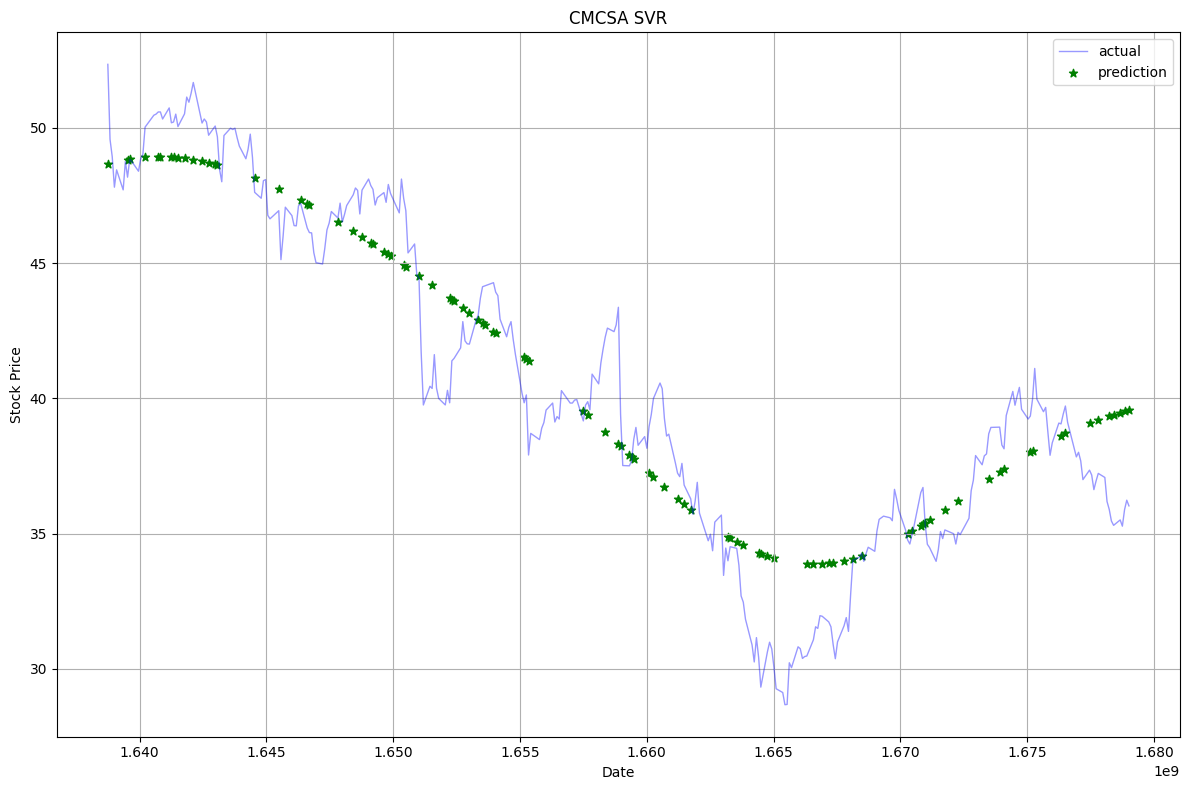

---- Model: CMCSA SVR ----
R2 Score                       0.8896330784734388
D2 Absolute Error Score        0.6822697983842432
Max Error                      5.0582950280075565
Mean Absolute Error            1.6994307546627518
Mean Squared Error             4.377521021113829
----------------------




In [429]:

svr_x = company_stock_data_df['unix_time']
svr_y = company_stock_data_df['close']
x_train, x_test, y_train, y_test = train_test_split(svr_x, svr_y, test_size=0.3, random_state=20)

x_train = np.array(x_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)

y_train = np.array(y_train).reshape(-1)
y_test = np.array(y_test)
svr_title = ticker_symbol + " SVR"

trained_model = SVR().fit(x_train, y_train)
svr_prediction = trained_model.predict(x_test)

plt.figure(figsize=(12,8),dpi=100)
ax = plt.axes()
ax.grid()
ax.set(xlabel='Date', ylabel='Stock Price', title=svr_title)

ax.plot(company_stock_data_df['unix_time'], company_stock_data_df['close'], label='actual', c='b', linewidth=1, alpha=.4)
#ax.scatter(x_test, y_test, label='test', c='r')
ax.scatter(x_test, svr_prediction, label='prediction', c='g',  marker='*')

plt.tight_layout()
plt.legend()
plt.show()

calculate_metrics(y_test, svr_prediction, svr_title)

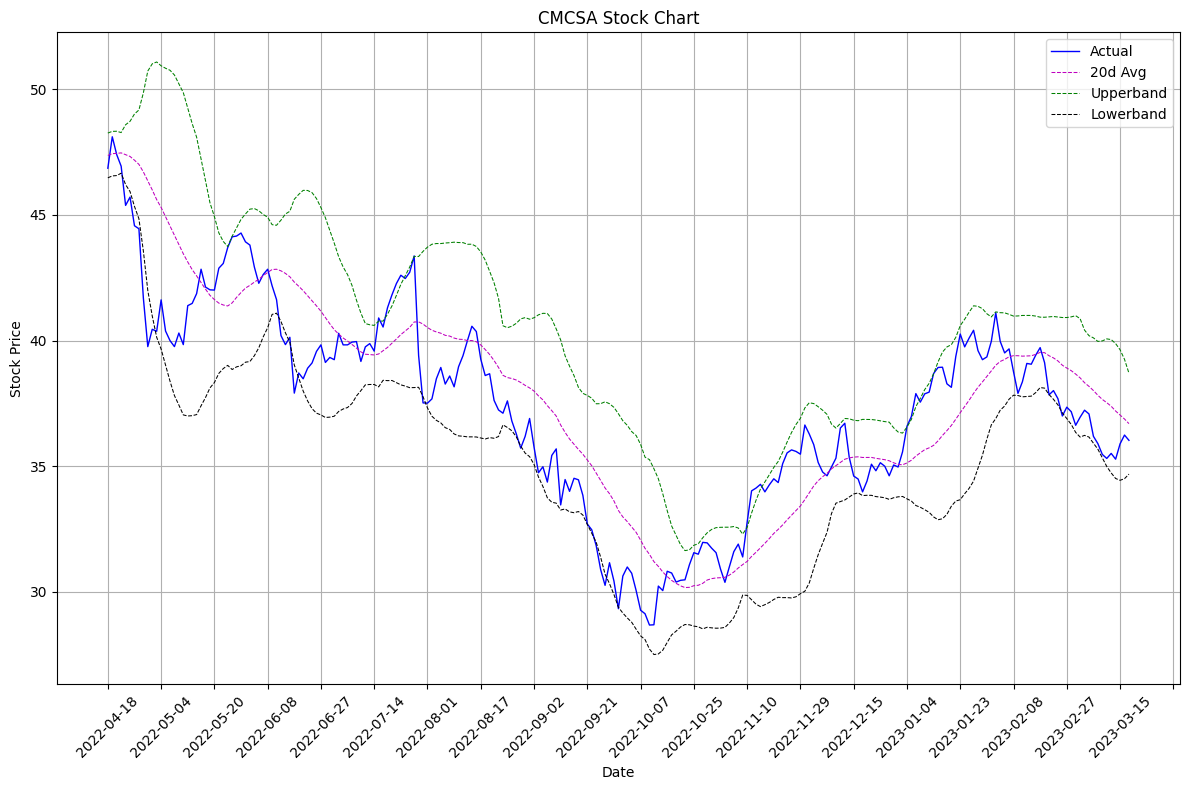

In [430]:
### Technical Indicators
ticker_symbol = 'CMCSA'

tech_indicators_csv_file_path = './data/technical_indicators.csv'

all_stock_df = pd.read_csv(tech_indicators_csv_file_path, header = 0)

stock_technical_df = all_stock_df[all_stock_df['symbol'] == ticker_symbol].drop('symbol', axis = 1).sort_values(by=['unix_time'])

plt.figure(figsize=(12,8),dpi=100)
ax = plt.axes()
ax.grid()
ax.set(xlabel='Date', ylabel='Stock Price', title=ticker_symbol + ' Stock Chart')

ax.plot(stock_technical_df['date'], stock_technical_df['close'], label='Actual', c='b', linewidth=1)
ax.plot(stock_technical_df['date'], stock_technical_df['middleband'], label='20d Avg', c='m', linewidth=.75, linestyle = 'dashed')
ax.plot(stock_technical_df['date'], stock_technical_df['upperband'], label='Upperband', c='g', linewidth=.75, linestyle = 'dashed')
ax.plot(stock_technical_df['date'], stock_technical_df['lowerband'], label='Lowerband', c='k', linewidth=.75, linestyle = 'dashed')

ax.xaxis.set_major_locator(mticker. MultipleLocator(12))

for tick in ax.get_xticklabels():
    tick.set_rotation(45)

plt.tight_layout()
plt.legend()
plt.show()



future_dates: [[1679184000]
 [1679356800]
 [1679529600]
 [1679702400]
 [1679875200]
 [1680048000]
 [1680220800]
 [1680393600]
 [1680566400]
 [1680739200]
 [1680912000]
 [1681084800]
 [1681257600]
 [1681430400]
 [1681603200]
 [1681776000]
 [1681948800]
 [1682121600]
 [1682294400]
 [1682467200]]
future_predictions: [40.10735  36.942725 34.92     30.58009  35.225915 34.764935 40.05442
 40.05442  41.47787  38.58344  32.8085   40.460805 41.6489   39.39091
 34.753775 38.94752  40.791505 38.588645 38.146695 41.61433 ]
y_pred: [38.6070281  37.3411781  35.1650418  32.18738715 34.09641435 35.52290545
 38.7210472  40.0905     40.7908116  38.70548445 34.922308   39.1171285
 41.08808155 39.71645475 36.5943127  38.22230245 40.01451685 39.0040586
 38.5137594  40.50663005]


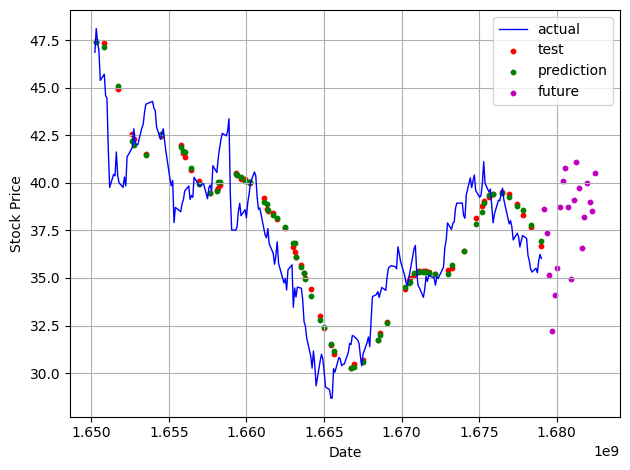

In [431]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#### Attempted Future Prediction
data_x = stock_technical_df['unix_time']
data_y = stock_technical_df['middleband']

#x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, shuffle=False, random_state=1)
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=20) #20

#pipeline = Pipeline([
#('std_scaler', StandardScaler()),
#])

model = RandomForestRegressor()
scaler = StandardScaler()

# LinearRegression(), Ridge(), ElasticNet(), DecisionTreeRegressor(), ExtraTreeRegressor(), RandomForestRegressor(), LassoLars() RandomForestRegressor(n_estimators=1000, n_jobs=-1)

x_train = np.array(x_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)

y_train# = np.array(y_train).reshape(-1)
y_test# = np.array(y_test).reshape(-1)#np.array(y_test)

model.fit(x_train, y_train)

prediction = model.predict(x_test)

future_date = int(stock_technical_df.tail(1)['unix_time'])
future_dates=[]
future_predictions=[]

for idx in range(20):
    future_date = future_date + 86400 + 86400
    future_dates.append(future_date)
    #modifier = random.randint(-50, 50) / 10000 + 1
    future_predictions.append(prediction[-idx])
    #future_predictions.append(y_test[-idx])

future_dates = np.array(future_dates).reshape(-1, 1)
future_predictions = np.array(future_predictions)

#scaler.fit(x_train, y_train)
#x_train_scaled = scaler.transform(future_dates)

model.fit(future_dates, future_predictions)

y_pred = model.predict(future_dates)
#new_data = np.array([-1.,  1., 0.])    
print(f"future_dates: {future_dates}")
#print(f"x_train_scaled: {x_train_scaled}")

print(f"future_predictions: {future_predictions}")
print(f"y_pred: {y_pred}")

ax = plt.axes()
ax.grid()
ax.set(xlabel='Date', ylabel='Stock Price')

ax.plot(stock_technical_df['unix_time'], stock_technical_df['close'], label='actual', c='b', linewidth=1)
ax.scatter(x_test[:,0], y_test, label='test', c='r', s=10)
ax.scatter(x_test[:,0], prediction, label='prediction', c='g', s=10)
ax.scatter(future_dates[:,0], y_pred, label='future', c='m', s=10)

plt.tight_layout()
plt.legend()
plt.show()

In [432]:
class BaselineModel:
    def predict(self, X):
        return X[:,-1] # return the last value for each input sequence


X.shape (221, 10) Y.shape (221,)


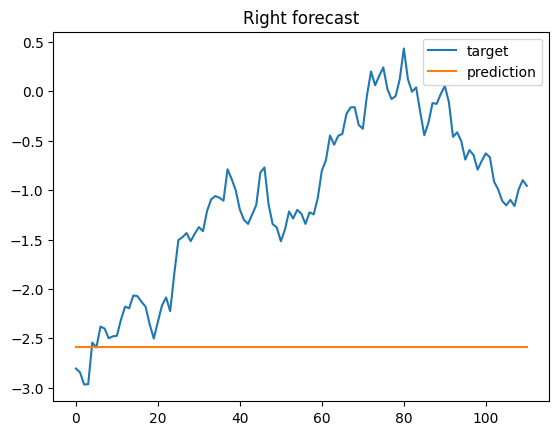

In [433]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


series = stock_technical_df['close'].values.reshape(-1, 1)

scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()


T = 10
D = 1
X = []
Y = []

for t in range(len(series) -T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)


X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)


Xtrain, Ytrain = X[:-N//2], Y[:-N//2]
Xtest, Ytest = X[-N//2:], Y[-N//2:]

model = BaselineModel()
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)

Ytrain2 = scaler.inverse_transform(Ytrain.reshape(-1, 1)).flatten()
Ytest2 = scaler.inverse_transform(Ytest.reshape(-1, 1)).flatten()
Ptrain2 = scaler.inverse_transform(Ptrain.reshape(-1, 1)).flatten()
Ptest2 = scaler.inverse_transform(Ptest.reshape(-1, 1)).flatten()

# right forecast
forecast = []
input_ = Xtest[0]
while len(forecast) < len(Ytest):
  f = model.predict(input_.reshape(1, T))[0]
  forecast.append(f)
  # make a new input with the latest forecast
  input_ = np.roll(input_, -1)
  input_[-1] = f
plt.plot(Ytest, label='target')
plt.plot(forecast, label='prediction')
plt.legend()
plt.title("Right forecast")
plt.show()
